In [42]:
#importing all necessary libraries
from platform import python_version 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_auc_score,roc_curve,f1_score,precision_score,recall_score
plt.rcParams["figure.figsize"]=[7,5]

In [2]:
#importing data
df = pd.read_csv(r"C:\Users\HP\Desktop\MSc Project\Myproject\Proj_ideas\heart-risk-prediction\Datasets\Kaggle_data\cleaned_data.csv")
#storing original data into a new variable
data = df.copy()

In [3]:
#get top 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<AxesSubplot:xlabel='chol'>

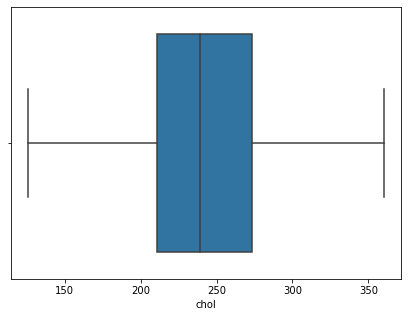

In [47]:
sns.boxplot(df["chol"])

<AxesSubplot:xlabel='thalach'>

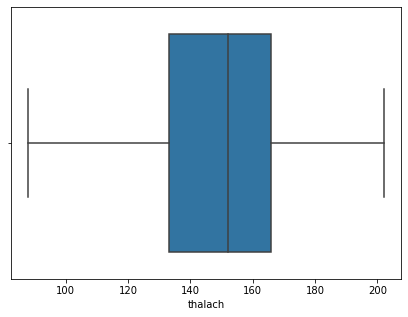

In [46]:
sns.boxplot(df["thalach"])

<AxesSubplot:xlabel='oldpeak'>

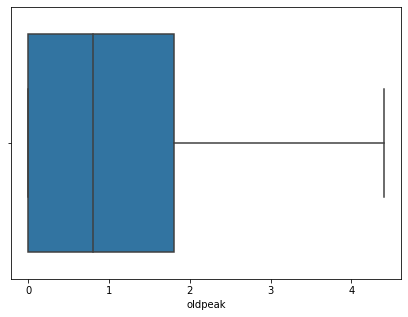

In [45]:
sns.boxplot(df["oldpeak"])

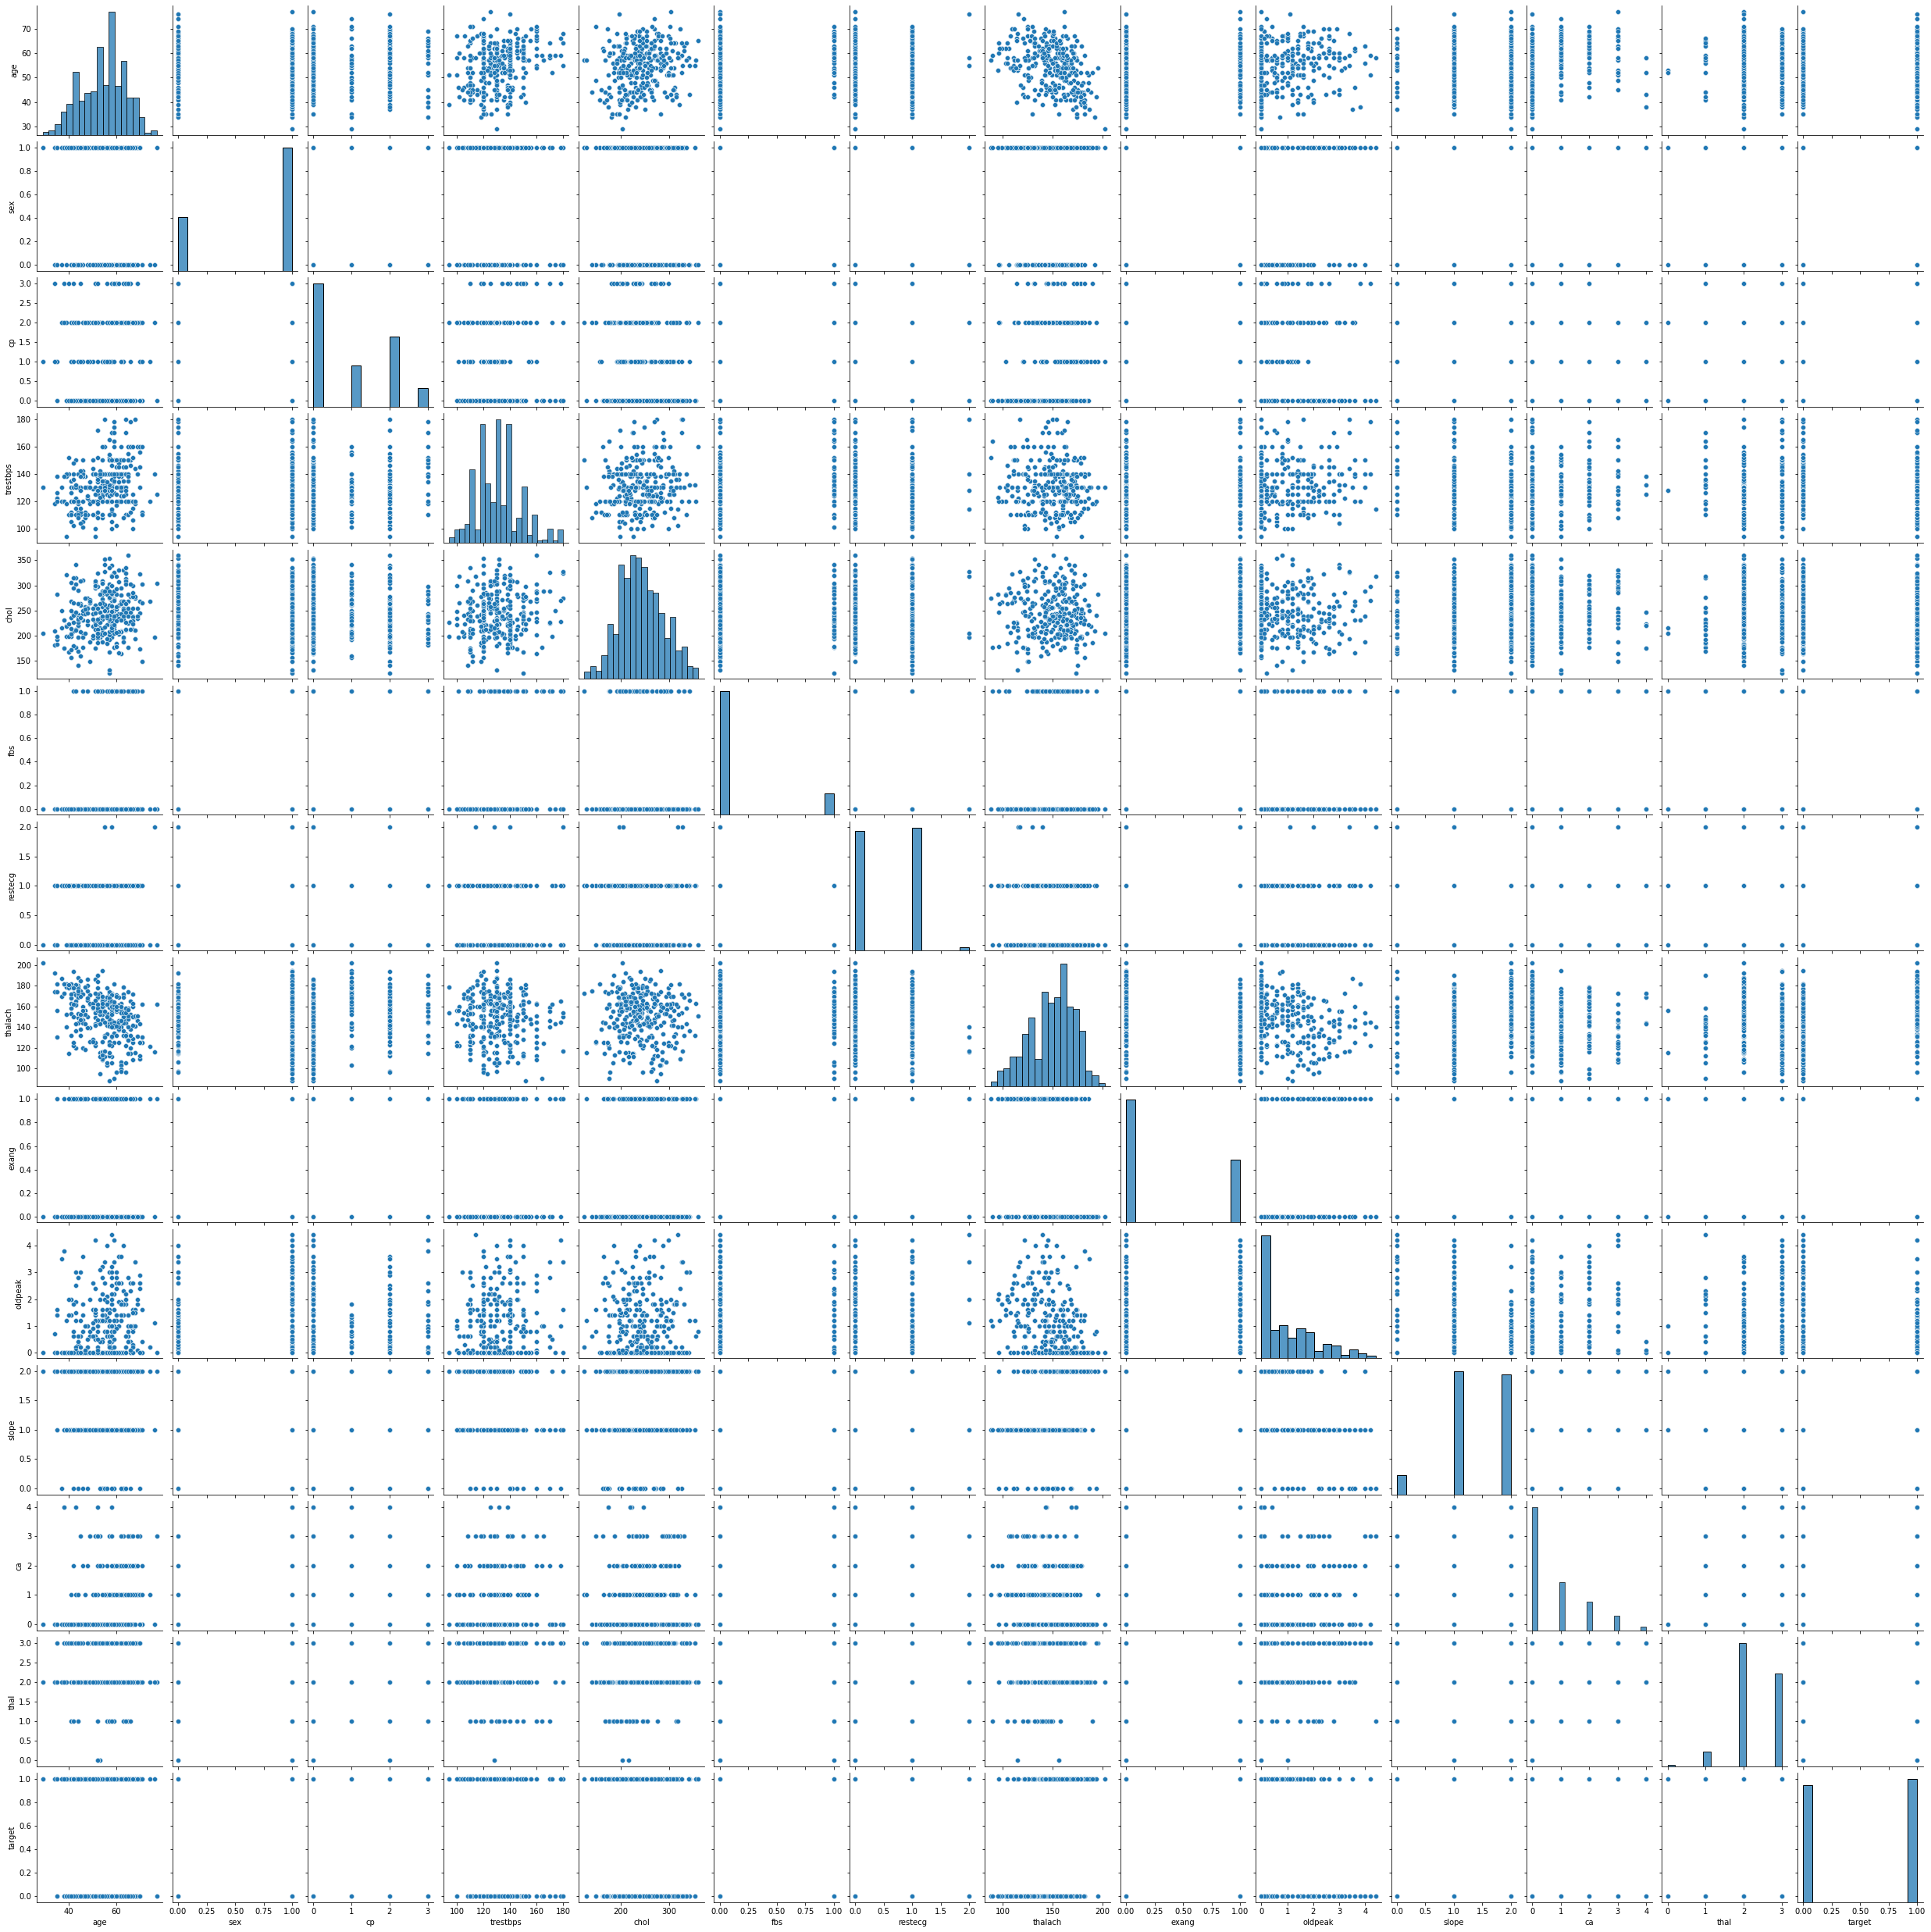

In [7]:
sns.pairplot(df)

In [8]:
df.shape

(1025, 14)

In [9]:
#split data into train and test
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [10]:
print("shape of X : ",X.shape)
print("shape of y : ",y.shape)

shape of X :  (1025, 13)
shape of y :  (1025, 1)


In [11]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [12]:
#printing all shapes
print("X_train shape : ",X_train.shape)
print("X_test shape : ",X_test.shape)
print("y_train shape : ",y_train.shape)
print("y_train shape : ",y_test.shape)

X_train shape :  (820, 13)
X_test shape :  (205, 13)
y_train shape :  (820, 1)
y_train shape :  (205, 1)


In [44]:
models = {"logistic Regression":LogisticRegression(random_state=0),
          "NaiveByas classifier":GaussianNB(),
          "KNN classifier": KNeighborsClassifier(),
          "Decision Tree Classifier":DecisionTreeClassifier(random_state=0),
          "RandomForest Classifier":RandomForestClassifier(random_state=0),
          "GradientBoost Classifier":GradientBoostingClassifier(random_state=0),
          "Xgboost classifier":XGBClassifier(random_state=0),
          "Adaboost classifier":AdaBoostClassifier(random_state=0)}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    #make predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    #model name
    print(list(models.keys())[i])
    print("***************************************")
    
    #performance evaluation on train data
    train_accuracy = accuracy_score(y_train,train_pred)
    train_precision_score = precision_score(y_train,train_pred)
    train_recall_score = recall_score(y_train,train_pred)
    train_f1_score = f1_score(y_train,train_pred)
    train_roc_auc_score = roc_auc_score(y_train,train_pred)
    
    #performance evaluation on test data
    test_accuracy = accuracy_score(y_test,test_pred)
    test_precision_score = precision_score(y_test,test_pred)
    test_recall_score = recall_score(y_test,test_pred)
    test_f1_score = f1_score(y_test,test_pred)
    test_roc_auc_score = roc_auc_score(y_test,test_pred)
    
    #print all metrics of train data
    print(f"train_accuracy : {round(train_accuracy*100,2)}"+"%")
    print(f"train_precision_score : {round(train_precision_score*100,2)}"+"%")
    print(f"train_recall_score : {round(train_recall_score*100,2)}"+"%")
    print(f"train_f1_score : {round(train_f1_score*100,2)}"+"%")
    print(f"train_roc_auc_score : {round(train_roc_auc_score*100,2)}"+"%")
    print("--------------------------------------------------")
    
    #print all metrics of test data
    print(f"test_accuracy : {round(test_accuracy*100,2)}"+"%")
    print(f"test_precision_score : {round(test_precision_score*100,2)}"+"%")
    print(f"test_recall_score : {round(test_recall_score*100,2)}"+"%")
    print(f"test_f1_score : {round(test_f1_score*100,2)}"+"%")
    print(f"test_roc_auc_score : {round(test_roc_auc_score*100,2)}"+"%")
    if i!=len(list(models.values()))-1:
        print("=============================================") 

logistic Regression
***************************************
train_accuracy : 87.32%
train_precision_score : 84.9%
train_recall_score : 91.73%
train_f1_score : 88.18%
train_roc_auc_score : 87.17%
--------------------------------------------------
test_accuracy : 82.44%
test_precision_score : 77.69%
test_recall_score : 91.26%
test_f1_score : 83.93%
test_roc_auc_score : 82.4%
NaiveByas classifier
***************************************
train_accuracy : 84.02%
train_precision_score : 81.88%
train_recall_score : 88.65%
train_f1_score : 85.13%
train_roc_auc_score : 83.87%
--------------------------------------------------
test_accuracy : 79.51%
test_precision_score : 74.8%
test_recall_score : 89.32%
test_f1_score : 81.42%
test_roc_auc_score : 79.46%
KNN classifier
***************************************
train_accuracy : 92.8%
train_precision_score : 94.39%
train_recall_score : 91.49%
train_f1_score : 92.92%
train_roc_auc_score : 92.85%
--------------------------------------------------
test_

logistic Regression


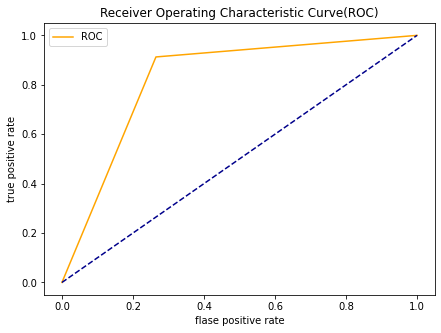

auc score : 82.4%
 
 
NaiveByas classifier


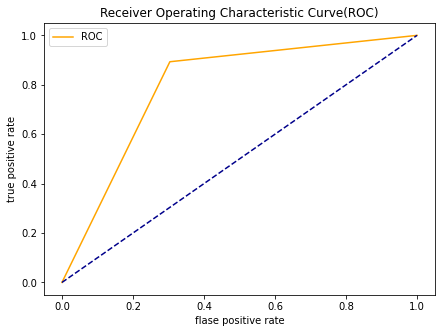

auc score : 79.46%
 
 
KNN classifier


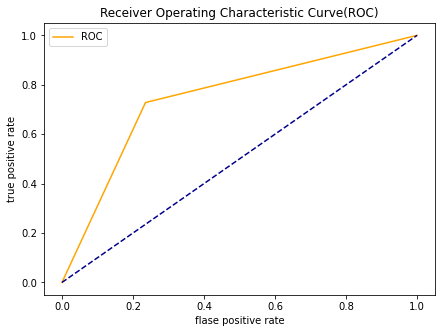

auc score : 74.64%
 
 
Decision Tree Classifier


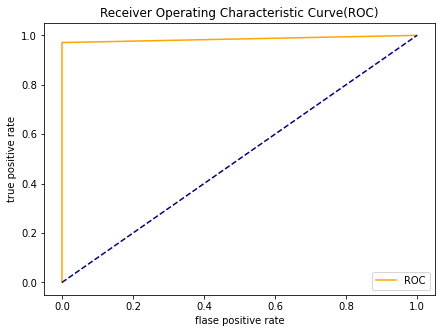

auc score : 98.54%
 
 
RandomForest Classifier


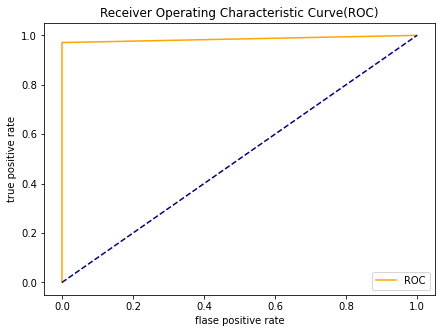

auc score : 98.54%
 
 
GradientBoost Classifier


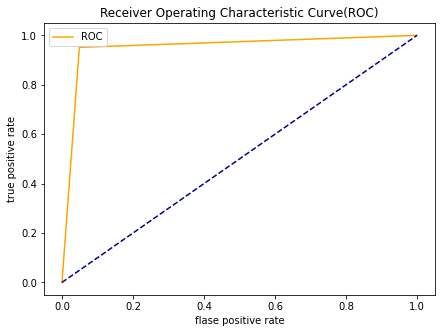

auc score : 95.12%
 
 
Xgboost classifier


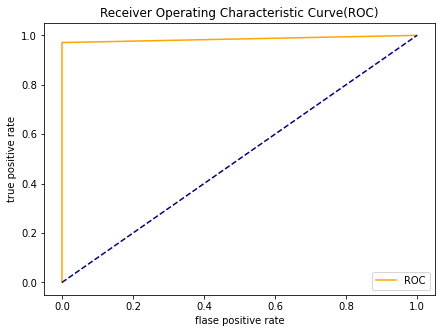

auc score : 98.54%
 
 
Adaboost classifier


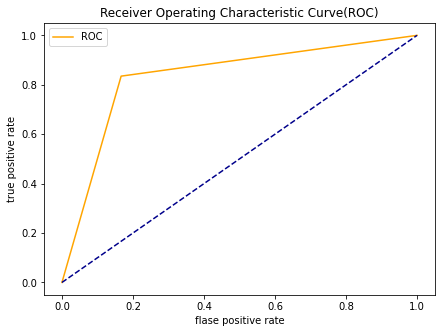

auc score : 83.41%


In [103]:
#roc curve of top models

#roc function
def roc_plotter(fpr, tpr):
    plt.plot(fpr,tpr,color="orange",label="ROC")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--")
    plt.xlabel("flase positive rate")
    plt.ylabel("true positive rate")
    plt.title("Receiver Operating Characteristic Curve(ROC)")
    plt.legend()
    plt.show()

#looping through all the models
auc_scores = {}
for i in range(len(list(models.values()))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    #making predictions
    test_pred = model.predict(X_test)
    
    #roc_auc curve
    print(list(models.keys())[i])
    fpr, tpr, thresholds = roc_curve(y_test,test_pred)
    roc_plotter(fpr,tpr)
    auc_scores[list(models.values())[i]] = round(roc_auc_score(y_test,test_pred)*100,2)
    print(f"auc score : {round(roc_auc_score(y_test,test_pred)*100,2)}"+"%")
    if i!=len(list(models.values()))-1:
        print(" ")
        print("===========================================================================================")
        print(" ")
    
    

#### By the above metrics, we have understood that following models are giving best results without even hyperparameter tunning.
##### 1) DecisionTree Classifier
##### 2) RandomForest Classifier
##### 3) Xgboost Classifier

In [105]:
#confusion matrix for 3 best models to check which is giving less false positive rate

#get values and keys seperate in the form of list
auc_scores = {keys:values for keys,values in sorted(auc_scores.items(),key= lambda values:values[1],reverse=True)}
top_three_pred = []
for i in range(3):
    model = list(auc_scores.keys())[i]
    model.fit(X_train,y_train)
    
    #making predictions
    top_three_pred.append(pd.Series(model.predict(X_test)))
    test_pred = model.predict(X_test)
    
    #Confusion matrix
    print(list(auc_scores.keys())[i])
    print("******************************************************************************")
    print(confusion_matrix(y_test,test_pred))
    if i<=2:
        print("===========================================================================")


DecisionTreeClassifier(random_state=0)
******************************************************************************
[[102   0]
 [  3 100]]
RandomForestClassifier(random_state=0)
******************************************************************************
[[102   0]
 [  3 100]]
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
*******************

#### As the false negative count is same for all the top 3 models, we can conside any one of them randomly.

In [ ]:
# getting a decision tree model ready to dump
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)
test_pred = model.predict(X_test)

In [ ]:
#Saving the best model
import pickle
with open("final_model","wb") as f:
    pickle.dump("")